In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
%matplotlib inline

In [2]:
# cool, viridis, jet
cmap = plt.cm.viridis
cmap.set_under("w")

In [28]:
# fits and map settings

main_folder = '../../../data/'
name = '../../../data/COM_CMB_IQU-commander_1024_R2.02_full.fits'
file_name = 'COM_CMB_IQU-commander_1024_R2.02_full.fits'
mask = False
only_temp = True
nmax = 2048
lmax = 1024

In [22]:
if only_temp:
    cmbmap = hp.read_map(name, field=(0))
else:
    if mask:
        cmbmap = hp.read_map(name, field=(0, 1, 2, 3, 4))
    else:
        cmbmap = hp.read_map(name, field=(0, 1, 2))

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/Users/heyfaraday/anaconda/envs/astro_main/lib/python3.6/site-packages/healpy/fitsfunc.py:335: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


Ordering converted to RING


In [42]:
# mollview, cartview, orthview

def my_mollview(plot_map, coord = 'G', # 'G', ['G', 'E'] or ['G', 'C']
                xsize = 2000, title = '', min_value = 0.0, max_value = 0.0,
                cbar = True, notext = False, norm = 'hist', # None, 'hist' or 'log'
                flag_out = False, name_out = file_name):

    fig = plt.figure(figsize=(20,10))
    
    if min_value != 0.0 or max_value != 0.0:
        plot_map_out = hp.mollview(plot_map, fig.number, coord=coord, xsize=xsize, title=title, 
                                   min=min_value, max=max_value, 
                                   cbar=cbar, notext=notext, norm=norm, cmap=cmap, return_projected_map=True)
    else:
        plot_map_out = hp.mollview(plot_map, fig.number, coord=coord, xsize=xsize, title=title, 
                                   cbar=cbar, notext=notext, norm=norm, cmap=cmap, return_projected_map=True)

    if flag_out:
        plt.savefig(name_out, dpi=400)

/Users/heyfaraday/anaconda/envs/astro_main/lib/python3.6/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/heyfaraday/anaconda/envs/astro_main/lib/python3.6/site-packages/healpy/projaxes.py:808: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[np.isinf(val.data)] = -np.inf


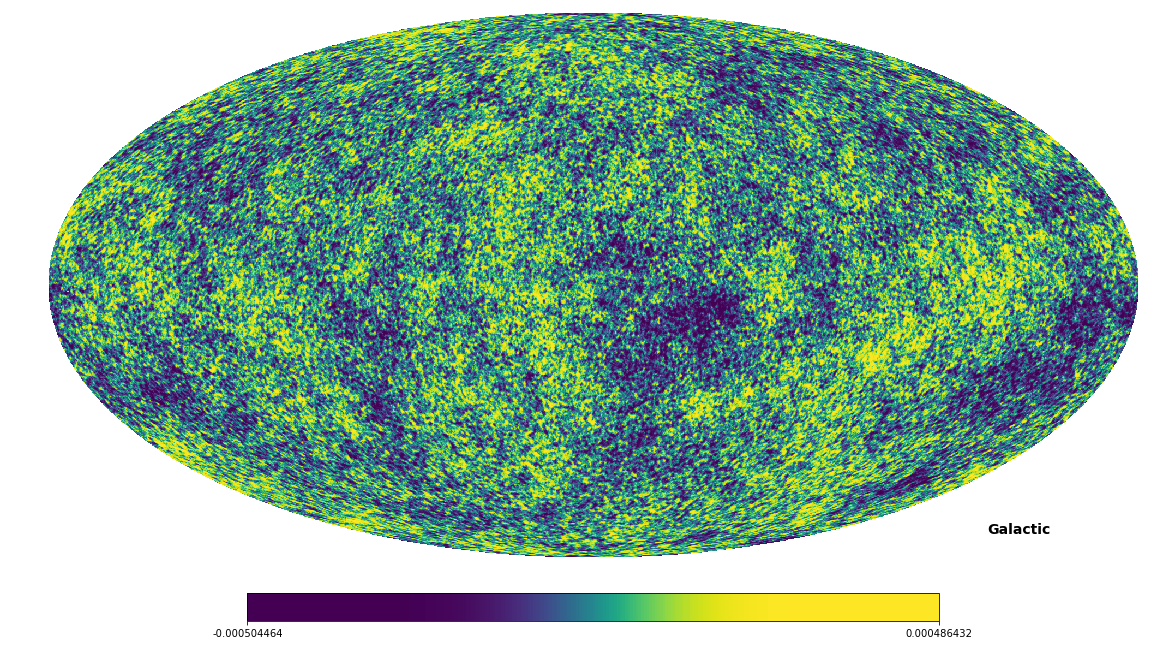

In [44]:
my_mollview(cmbmap)

In [48]:
cmbmap_alm = hp.sphtfunc.map2alm(cmbmap, lmax=lmax) #, pol=False, use_weights=True)
cmbmap_cl = hp.sphtfunc.alm2cl(cmbmap_alm, lmax=lmax)

In [51]:
def my_spectra_cl(cl):
    
    lvals, mvals = hp.sphtfunc.Alm.getlm(lmax, np.arange(hp.sphtfunc.Alm.getsize(lmax)))
    l = np.arange(len(cl))
    
    plt.figure(figsize=(20,10))
    plt.plot(l, cl * l * (l + 1))
    plt.xlabel('l'); 
    plt.ylabel('cl * l * (l + 1)'); 
    plt.grid()
    
def my_spectra_alm(alm):
    
    cl = hp.sphtfunc.alm2cl(alm, lmax=lmax)
    
    lvals, mvals = hp.sphtfunc.Alm.getlm(lmax, np.arange(hp.sphtfunc.Alm.getsize(lmax)))
    l = np.arange(len(cl))
    
    plt.figure(figsize=(20,10))
    plt.plot(l, cl * l * (l + 1))
    plt.xlabel('l'); 
    plt.ylabel('cl * l * (l + 1)'); 
    plt.grid()

In [57]:
def write_alm(alm, name):
    
    alm_file_cos = open('../data/' + name + '_cos.dat', 'w')
    alm_file_sin = open('../data/' + name + '_sin.dat', 'w')
    
    for m in range(0, lmax):
        for l in range(m, lmax):
            
            alm_file_cos.write(repr(m) + '  ' + repr(l) + '  ' + repr(alm[hp.Alm.getidx(lmax, l, m)].real) + '\n')
            alm_file_sin.write(repr(m) + '  ' + repr(l) + '  ' + repr(alm[hp.Alm.getidx(lmax, l, m)].imag) + '\n')

    alm_file_cos.close()
    alm_file_sin.close()

In [58]:
write_alm(cmbmap_alm, 'T_alm')